In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, make_scorer

- Dataset reference: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success
- Competition site: https://www.kaggle.com/competitions/playground-series-s4e6/overview

# Load dataset

In [146]:
df = pd.read_csv('./datasets/train.csv', index_col='id')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
id,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,1,1,3,9500,1,1,131.0,1,19,3,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,1,1,2,9500,1,1,132.0,1,19,37,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [147]:
y = df['Target']
X = df.drop(['Target'], axis=1)
X.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
id,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,0,6,7,6,12.428571,0,11.1,0.6,2.02
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,0,6,9,0,0.000000,0,11.1,0.6,2.02
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92
3,1,1,3,9500,1,1,131.0,1,19,3,...,0,0,8,11,7,12.820000,0,11.1,0.6,2.02
4,1,1,2,9500,1,1,132.0,1,19,37,...,0,0,7,12,6,12.933333,0,7.6,2.6,0.32


# Data Exploration

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76518 entries, 0 to 76517
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  76518 non-null  int64  
 1   Application mode                                76518 non-null  int64  
 2   Application order                               76518 non-null  int64  
 3   Course                                          76518 non-null  int64  
 4   Daytime/evening attendance                      76518 non-null  int64  
 5   Previous qualification                          76518 non-null  int64  
 6   Previous qualification (grade)                  76518 non-null  float64
 7   Nacionality                                     76518 non-null  int64  
 8   Mother's qualification                          76518 non-null  int64  
 9   Father's qualification                      

In [88]:
# valores faltantes
df.isnull().sum().sum()

0

In [89]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [149]:
df.select_dtypes(include='object')

,Target
id,
0,Graduate
1,Dropout
2,Dropout
3,Enrolled
4,Graduate
...,...
76513,Graduate
76514,Graduate
76515,Enrolled


### Variáveis
- Marital Status: numbers -> Transform into categorical var
- Application mode: numbers -> Transform into categorical var
- Course: numbers -> Transform into categorical var
- Daytime/evening attendance -> transform into categorical var
- Previous qualification -> transform into categorical var
- previous qualification (grade) -> looks like numerical
- Nacionality -> transform into categorical var
- Mother's qualification -> transform into cat var
- Father's qualification -> transform into cat var
- Mother's occupation -> transform into cat var
- Father's occupation -> transform into cat var
- Addmission grade -> looks numericals
- Displaced -> transform into binary var
- Educational special needs -> binary var
- Debtor -> binary var
- Tuition fees up to date -> binary var
- Gender -> binary var
- Scholarship holder -> binary var
- Age at enrollment -> numerical var (ok)
- International -> binary var
- Curricular units -> I'm not sure what this is.

In [150]:
df = df.astype('category')
df = df.astype({'Previous qualification (grade)': 'float64',
           'Admission grade': 'float64',
           'Age at enrollment': 'int64',
           'Curricular units 1st sem (credited)': 'int64',
           'Curricular units 1st sem (enrolled)': 'int64',
           'Curricular units 1st sem (evaluations)': 'int64',
           'Curricular units 1st sem (approved)': 'int64',
           'Curricular units 1st sem (grade)': 'float64',
           'Curricular units 1st sem (without evaluations)': 'int64',
           'Curricular units 2nd sem (credited)': 'int64',
           'Curricular units 2nd sem (enrolled)': 'int64',
           'Curricular units 2nd sem (evaluations)': 'int64',
           'Curricular units 2nd sem (approved)': 'int64',
           'Curricular units 2nd sem (grade)': 'float64',
           'Curricular units 2nd sem (without evaluations)': 'int64',
           'Unemployment rate': 'float64',
           'Inflation rate': 'float64',
           'GDP': 'float64'
           })

In [151]:
df.dtypes

Marital status                                    category
Application mode                                  category
Application order                                 category
Course                                            category
Daytime/evening attendance                        category
Previous qualification                            category
Previous qualification (grade)                     float64
Nacionality                                       category
Mother's qualification                            category
Father's qualification                            category
Mother's occupation                               category
Father's occupation                               category
Admission grade                                    float64
Displaced                                         category
Educational special needs                         category
Debtor                                            category
Tuition fees up to date                           catego

<Axes: xlabel='Target', ylabel='count'>

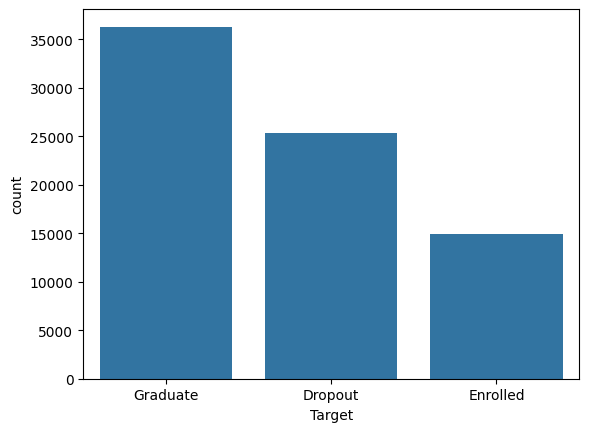

In [94]:
sns.barplot(y.value_counts())

# Preprocessing

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [202]:
cat_variables = df.drop('Target', axis=1).select_dtypes(include='category').columns.to_list()
num_variables = df.select_dtypes(include=['int64', 'float64']).columns.to_list()

In [203]:
ct = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_variables),
    ('num', StandardScaler(), num_variables)
])

X_trans = ct.fit_transform(X)

In [204]:
X_trans

<76518x280 sparse matrix of type '<class 'numpy.float64'>'
	with 2085077 stored elements in Compressed Sparse Row format>

In [205]:
col_names = ct.named_transformers_['cat'].get_feature_names_out().tolist()+ct.named_transformers_['num'].get_feature_names_out().tolist()
X_trans = pd.DataFrame.sparse.from_spmatrix(X_trans, columns=col_names)

In [172]:
col_names

['Marital status_2',
 'Marital status_3',
 'Marital status_4',
 'Marital status_5',
 'Marital status_6',
 'Application mode_2',
 'Application mode_3',
 'Application mode_4',
 'Application mode_5',
 'Application mode_7',
 'Application mode_9',
 'Application mode_10',
 'Application mode_12',
 'Application mode_15',
 'Application mode_16',
 'Application mode_17',
 'Application mode_18',
 'Application mode_26',
 'Application mode_27',
 'Application mode_35',
 'Application mode_39',
 'Application mode_42',
 'Application mode_43',
 'Application mode_44',
 'Application mode_51',
 'Application mode_53',
 'Application order_1',
 'Application order_2',
 'Application order_3',
 'Application order_4',
 'Application order_5',
 'Application order_6',
 'Application order_9',
 'Course_39',
 'Course_171',
 'Course_979',
 'Course_8014',
 'Course_9003',
 'Course_9070',
 'Course_9085',
 'Course_9119',
 'Course_9130',
 'Course_9147',
 'Course_9238',
 'Course_9254',
 'Course_9500',
 'Course_9556',
 'Course_

In [163]:
X_trans.head()

,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Application mode_2,Application mode_3,Application mode_4,Application mode_5,Application mode_7,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.14189,-0.146765,0.040921,-0.066933,0.718660,0.505317,-0.135127,-0.158418,-0.449110,0.933176
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.14189,-0.146765,0.040921,0.504003,-1.445110,-1.735681,-0.135127,-0.158418,-0.449110,0.933176
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.14189,-0.146765,0.040921,-2.065210,-1.445110,-1.735681,-0.135127,1.763675,-0.663578,-0.372698
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.14189,-0.146765,1.270048,1.074940,1.079288,0.575895,-0.135127,-0.158418,-0.449110,0.933176
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.14189,-0.146765,0.655484,1.360408,0.718660,0.596330,-0.135127,-1.477502,0.980680,0.178079


# Feature Selection

In [67]:
from sklearn.feature_selection import RFECV

In [70]:
# values from Optuna
clf = RandomForestClassifier(
        n_estimators=100,
        max_depth=27,
        min_samples_split=7,
        min_samples_leaf=1,
        random_state=42
    )

selector = RFECV(clf, step=1, cv=5, scoring=make_scorer(accuracy_score))
selector = selector.fit(X_trans, y)


KeyboardInterrupt: 

# Optuna

In [164]:
def objective(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    
    # Create a RandomForestClassifier with the suggested hyperparameters
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    kf = KFold(n_splits=5)
    acc = [] 

    # Train the model
    for i, (train_index, test_index) in enumerate(kf.split(X_trans)):
        print(f'Kfold: {i}')
        clf.fit(X_trans.iloc[train_index], y[train_index])
        y_pred = clf.predict(X_trans.iloc[test_index])
        acc.append(accuracy_score(y[test_index], y_pred))
    
    # Calculate accuracy
    accuracy = np.mean(acc)
    
    return accuracy


In [ ]:
# Create a study object and specify the direction of optimization
study = optuna.create_study(direction='maximize')

# Optimize the objective function
study.optimize(objective, n_trials=50)

# Print the best hyperparameters and the corresponding accuracy
print('Best hyperparameters:', study.best_params)
print('Best accuracy:', study.best_value)


# Evaluate model

In [30]:
# values from Optuna
clf = RandomForestClassifier(
        n_estimators=100,
        max_depth=27,
        min_samples_split=7,
        min_samples_leaf=1,
        random_state=42
    )

y_pred = clf.fit(X_trans, y)

In [58]:
feature_importances = clf.feature_importances_
feature_names_in = clf.feature_names_in_

In [59]:
print('Top 20 features by feature importances')
most_important_features = sorted(zip(feature_importances, feature_names_in), reverse=True)[0:30]
most_important_features

Top 20 features by feature importances


[(0.23717479212021048, 'Curricular units 2nd sem (approved)'),
 (0.19276256641696565, 'Curricular units 1st sem (approved)'),
 (0.07755956505143712, 'Curricular units 2nd sem (evaluations)'),
 (0.07021640297460942, 'Curricular units 1st sem (evaluations)'),
 (0.045342037571617554, 'Tuition fees up to date_1'),
 (0.03892187160865344, 'Age at enrollment'),
 (0.03528718817274194, 'Scholarship holder_1'),
 (0.021239497960192456, 'Curricular units 2nd sem (enrolled)'),
 (0.01987590803899424, 'Application mode_39'),
 (0.019235818366483356, 'Curricular units 1st sem (enrolled)'),
 (0.017216875127898122, 'Gender_1'),
 (0.01607705430687772, 'Debtor_1'),
 (0.007577871458403177, 'Course_9500'),
 (0.006045119947070335, 'Course_9147'),
 (0.006031297610314499, 'Course_9853'),
 (0.005565968173254438, "Mother's qualification_34"),
 (0.005239125664491659, 'Displaced_1'),
 (0.0047465140524226, 'Application order_1'),
 (0.0045412770880508225, 'Course_9119'),
 (0.004322581222427299, "Father's qualificatio

<Axes: xlabel='Importance', ylabel='Feature'>

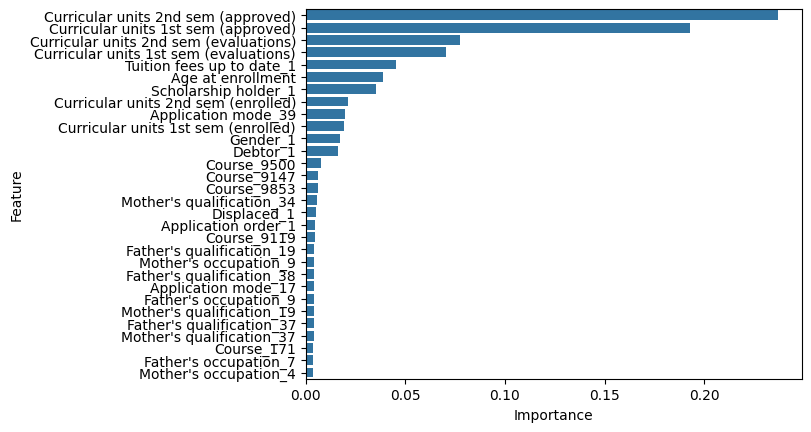

In [60]:
feature_importances = pd.DataFrame(most_important_features, columns=['Importance', 'Feature'])
sns.barplot(x='Importance', y='Feature', data=feature_importances)

Only the first 12 seem relevant.

In [63]:
X_trans[feature_importances[0:12]['Feature']]

,Curricular units 2nd sem (approved),Curricular units 1st sem (approved),Curricular units 2nd sem (evaluations),Curricular units 1st sem (evaluations),Tuition fees up to date_1,Age at enrollment,Scholarship holder_1,Curricular units 2nd sem (enrolled),Application mode_39,Curricular units 1st sem (enrolled),Gender_1,Debtor_1
0,0.718660,0.677640,-0.066933,-0.385478,1.0,-0.621067,1.0,0.040921,0.0,0.064892,0.0,0.0
1,-1.445110,-0.066414,0.504003,0.184603,1.0,-0.621067,0.0,0.040921,0.0,0.064892,0.0,0.0
2,-1.445110,-1.554522,-2.065210,-2.095724,1.0,-0.621067,0.0,0.040921,0.0,0.064892,1.0,0.0
3,1.079288,1.049667,1.074940,0.469644,1.0,-0.621067,1.0,1.270048,0.0,0.663062,0.0,0.0
4,0.718660,0.677640,1.360408,1.324767,1.0,-0.621067,0.0,0.655484,0.0,0.663062,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
76513,0.358031,0.677640,0.218535,0.469644,1.0,-0.621067,1.0,0.040921,0.0,0.064892,0.0,0.0
76514,0.718660,-0.066414,0.504003,4.175176,1.0,-0.475912,0.0,0.040921,0.0,0.064892,0.0,0.0
76515,0.358031,-0.066414,0.218535,1.609808,1.0,-0.475912,0.0,-0.573642,0.0,-0.533278,0.0,0.0
76516,-1.445110,-1.554522,-2.065210,-2.095724,1.0,-0.621067,0.0,0.040921,0.0,0.064892,0.0,0.0


In [65]:
X_reduced = X_trans[feature_importances[0:12]['Feature']]

clf = RandomForestClassifier(
        n_estimators=100,
        max_depth=27,
        min_samples_split=7,
        min_samples_leaf=1,
        random_state=42
    )

kf = KFold(n_splits=5)
acc = [] 

# Train the model
for i, (train_index, test_index) in enumerate(kf.split(X_reduced)):
    print(f'Kfold: {i}')
    clf.fit(X_reduced.iloc[train_index], y[train_index])
    y_pred = clf.predict(X_reduced.iloc[test_index])
    acc.append(accuracy_score(y[test_index], y_pred))

Kfold: 0
Kfold: 1
Kfold: 2
Kfold: 3
Kfold: 4


In [66]:
np.mean(acc)

0.8137692782479743

# AutoGluon

In [100]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [165]:
df_autogluon = X_trans
df_autogluon['y'] = y
df_autogluon = TabularDataset(df_autogluon)
df_autogluon.head()

,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Application mode_2,Application mode_3,Application mode_4,Application mode_5,Application mode_7,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.146765,0.040921,-0.066933,0.718660,0.505317,-0.135127,-0.158418,-0.449110,0.933176,Graduate
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.146765,0.040921,0.504003,-1.445110,-1.735681,-0.135127,-0.158418,-0.449110,0.933176,Dropout
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.146765,0.040921,-2.065210,-1.445110,-1.735681,-0.135127,1.763675,-0.663578,-0.372698,Dropout
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.146765,1.270048,1.074940,1.079288,0.575895,-0.135127,-0.158418,-0.449110,0.933176,Enrolled
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.146765,0.655484,1.360408,0.718660,0.596330,-0.135127,-1.477502,0.980680,0.178079,Graduate


In [169]:
predictor = TabularPredictor(label='y', eval_metric='accuracy').fit(df_autogluon, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20240611_144058"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 3600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240611_144058/ds_sub_fit/sub_fit_ho.
2024-06-11 11:41:02,128	INFO util.py:154 -- Missing packages: ['ipywidgets']. 

(raylet) A worker died or was killed while executing a task by an unexpected system error. To troubleshoot the problem, check the logs for the dead worker. RayTask ID: 82f2de7146e0fa1b606e7c3481c7b205964ee9ebffffffff Worker ID: 3e6a05cb3716fc606a65d4378a1f9b332c9cf9b1ce5d56553e046f17 Node ID: 556efccc4406bb270da1876ca393c887e20f057d4c083661c59a5a28 Worker IP address: 192.168.0.112 Worker port: 57353 Worker PID: 20026 Worker exit type: SYSTEM_ERROR Worker exit detail: The leased worker has unrecoverable failure. Worker is requested to be destroyed when it is returned. RPC Error message: Socket closed; RPC Error details: 


Spend 985 seconds for the sub-fit(s) during dynamic stacking.
Time left for full fit of AutoGluon: 2615 seconds.
Starting full fit now with num_stack_levels 1.
Beginning AutoGluon training ... Time limit = 2615s
AutoGluon will save models to "AutogluonModels/ag-20240611_144058"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #4355-Microsoft Thu Apr 12 17:37:00 PST 2024
CPU Count:          8
Memory Avail:       1.27 GB / 7.77 GB (16.3%)
Disk Space Avail:   147.03 GB / 237.83 GB (61.8%)
Train Data Rows:    76518
Train Data Columns: 280
Label Column:       y
Problem Type:       multiclass
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1173.83 MB
	Train Data (Original)  Memory Usage: 23.86 MB (2.0% of available memory)
	Inferring 

(raylet) A worker died or was killed while executing a task by an unexpected system error. To troubleshoot the problem, check the logs for the dead worker. RayTask ID: 45afc463ed38f34855bb7b7c9b6748c2eddf64bf01000000 Worker ID: 0a54b097ae9aa9a473c82f8b7118c06f7459e9f09609743b870884cc Node ID: 556efccc4406bb270da1876ca393c887e20f057d4c083661c59a5a28 Worker IP address: 192.168.0.112 Worker port: 60034 Worker PID: 491 Worker exit type: SYSTEM_ERROR Worker exit detail: The leased worker has unrecoverable failure. Worker is requested to be destroyed when it is returned. RPC Error message: Socket closed; RPC Error details: 
(raylet) A worker died or was killed while executing a task by an unexpected system error. To troubleshoot the problem, check the logs for the dead worker. RayTask ID: 720dd86924b2eac9e35d1d748b426c65383a509901000000 Worker ID: 4c96cb99ce7909ca9df5e0d48336a0051f521733bfc736c322516ce9 Node ID: 556efccc4406bb270da1876ca393c887e20f057d4c083661c59a5a28 Worker IP address: 192.

	Memory not enough to fit 8 folds in parallel. Will train 4 folds in parallel instead (Estimated 19.71% memory usage per fold, 78.82%/80.00% total).
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=2, gpus=0, memory=19.71%)
2024-06-11 12:37:34,064	ERROR worker.py:406 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2024-06-11 12:37:34,066	ERROR worker.py:406 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2024-06-11 12:37:34,069	ERROR worker.py:406 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
	0.7887	 = Validation score   (accur

In [170]:
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM_BAG_L2,0.833961,accuracy,88.641282,1615.655832,0.717303,41.963669,2,True,15
1,WeightedEnsemble_L3,0.833961,accuracy,88.650506,1620.674526,0.009224,5.018693,3,True,26
2,XGBoost_BAG_L2,0.833843,accuracy,88.862845,1664.207210,0.938865,90.515046,2,True,21
3,LightGBMXT_BAG_L2,0.833765,accuracy,88.522727,1633.000926,0.598748,59.308763,2,True,14
4,LightGBMLarge_BAG_L1,0.833556,accuracy,4.772610,114.889032,4.772610,114.889032,1,True,7
5,WeightedEnsemble_L2,0.833556,accuracy,4.783207,119.350974,0.010597,4.461942,2,True,13
6,CatBoost_r9_BAG_L2,0.833477,accuracy,88.184140,1681.791422,0.260161,108.099259,2,True,25
7,CatBoost_r177_BAG_L1,0.833451,accuracy,0.382942,246.386862,0.382942,246.386862,1,True,8
8,CatBoost_r177_BAG_L2,0.833268,accuracy,88.151143,1639.048842,0.227164,65.356678,2,True,23
9,LightGBMLarge_BAG_L2,0.833163,accuracy,88.693076,1672.854667,0.769097,99.162503,2,True,22


# Test dataset

In [182]:
df_test = pd.read_csv('./datasets/test.csv')
df_test = df_test.astype('category')
df_test = df_test.astype({'Previous qualification (grade)': 'float64',
           'Admission grade': 'float64',
           'Age at enrollment': 'int64',
           'Curricular units 1st sem (credited)': 'int64',
           'Curricular units 1st sem (enrolled)': 'int64',
           'Curricular units 1st sem (evaluations)': 'int64',
           'Curricular units 1st sem (approved)': 'int64',
           'Curricular units 1st sem (grade)': 'float64',
           'Curricular units 1st sem (without evaluations)': 'int64',
           'Curricular units 2nd sem (credited)': 'int64',
           'Curricular units 2nd sem (enrolled)': 'int64',
           'Curricular units 2nd sem (evaluations)': 'int64',
           'Curricular units 2nd sem (approved)': 'int64',
           'Curricular units 2nd sem (grade)': 'float64',
           'Curricular units 2nd sem (without evaluations)': 'int64',
           'Unemployment rate': 'float64',
           'Inflation rate': 'float64',
           'GDP': 'float64'
           })
id = df_test.pop('id')

In [177]:
df_test = pd.read_csv('./datasets/test.csv')
df_test = df_test.astype('category')
df_test = df_test.astype({'Previous qualification (grade)': 'float64',
           'Admission grade': 'float64',
           'Age at enrollment': 'int64',
           'Curricular units 1st sem (credited)': 'int64',
           'Curricular units 1st sem (enrolled)': 'int64',
           'Curricular units 1st sem (evaluations)': 'int64',
           'Curricular units 1st sem (approved)': 'int64',
           'Curricular units 1st sem (grade)': 'float64',
           'Curricular units 1st sem (without evaluations)': 'int64',
           'Curricular units 2nd sem (credited)': 'int64',
           'Curricular units 2nd sem (enrolled)': 'int64',
           'Curricular units 2nd sem (evaluations)': 'int64',
           'Curricular units 2nd sem (approved)': 'int64',
           'Curricular units 2nd sem (grade)': 'float64',
           'Curricular units 2nd sem (without evaluations)': 'int64',
           'Unemployment rate': 'float64',
           'Inflation rate': 'float64',
           'GDP': 'float64'
           })
id = df_test.pop('id')

cat_variables = df_test.select_dtypes(include='category').columns.to_list()
num_variables = df_test.select_dtypes(include=['int64', 'float64']).columns.to_list()

ct = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), cat_variables),
    ('num', StandardScaler(), num_variables)
])

df_test = ct.fit_transform(df_test)

col_names = ct.named_transformers_['cat'].get_feature_names_out().tolist()+ct.named_transformers_['num'].get_feature_names_out().tolist()
df_test = pd.DataFrame.sparse.from_spmatrix(df_test, columns=col_names)

In [178]:
df_test.head()

,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Application mode_2,Application mode_3,Application mode_5,Application mode_7,Application mode_10,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.143296,-0.147375,1.285135,-2.118802,-1.469064,-1.766338,-0.136585,0.897514,-1.089794,0.389264
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.143296,-0.147375,0.034924,-0.371118,0.712878,0.689656,-0.136585,-0.158656,-0.448201,0.935535
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.143296,-0.147375,0.034924,1.085285,0.349221,0.234843,-0.136585,1.501040,1.120136,-1.764733
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.143296,3.272438,1.285135,1.959127,0.349221,0.234843,-0.136585,-0.988505,0.122103,1.597278
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.143296,-0.147375,0.034924,0.502724,-0.014436,0.174201,4.144503,-1.478870,0.977560,0.180526


In [179]:
X_trans.head()

,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Application mode_2,Application mode_3,Application mode_4,Application mode_5,Application mode_7,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.146765,0.040921,-0.066933,0.718660,0.505317,-0.135127,-0.158418,-0.449110,0.933176,Graduate
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.146765,0.040921,0.504003,-1.445110,-1.735681,-0.135127,-0.158418,-0.449110,0.933176,Dropout
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.146765,0.040921,-2.065210,-1.445110,-1.735681,-0.135127,1.763675,-0.663578,-0.372698,Dropout
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.146765,1.270048,1.074940,1.079288,0.575895,-0.135127,-0.158418,-0.449110,0.933176,Enrolled
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.146765,0.655484,1.360408,0.718660,0.596330,-0.135127,-1.477502,0.980680,0.178079,Graduate


In [181]:
df_test

,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Application mode_2,Application mode_3,Application mode_5,Application mode_7,Application mode_10,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.143296,-0.147375,1.285135,-2.118802,-1.469064,-1.766338,-0.136585,0.897514,-1.089794,0.389264
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.143296,-0.147375,0.034924,-0.371118,0.712878,0.689656,-0.136585,-0.158656,-0.448201,0.935535
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.143296,-0.147375,0.034924,1.085285,0.349221,0.234843,-0.136585,1.501040,1.120136,-1.764733
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.143296,3.272438,1.285135,1.959127,0.349221,0.234843,-0.136585,-0.988505,0.122103,1.597278
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.143296,-0.147375,0.034924,0.502724,-0.014436,0.174201,4.144503,-1.478870,0.977560,0.180526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.143296,-0.147375,-3.715707,-2.118802,-1.469064,-1.766338,-0.136585,1.501040,1.120136,-1.764733
51008,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.143296,-0.147375,-0.590181,-0.662399,-1.469064,-1.766338,-0.136585,-0.799903,-1.446235,-1.347257
51009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.143296,-0.147375,-3.715707,-2.118802,-1.469064,-1.766338,-0.136585,1.501040,1.120136,-1.764733
51010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.143296,-0.147375,0.034924,0.502724,-0.378093,0.598693,-0.136585,-1.478870,0.977560,0.180526


# Submission

In [210]:
df_test = pd.read_csv('./datasets/test.csv')
df_test = df_test.astype('category')
df_test = df_test.astype({'Previous qualification (grade)': 'float64',
           'Admission grade': 'float64',
           'Age at enrollment': 'int64',
           'Curricular units 1st sem (credited)': 'int64',
           'Curricular units 1st sem (enrolled)': 'int64',
           'Curricular units 1st sem (evaluations)': 'int64',
           'Curricular units 1st sem (approved)': 'int64',
           'Curricular units 1st sem (grade)': 'float64',
           'Curricular units 1st sem (without evaluations)': 'int64',
           'Curricular units 2nd sem (credited)': 'int64',
           'Curricular units 2nd sem (enrolled)': 'int64',
           'Curricular units 2nd sem (evaluations)': 'int64',
           'Curricular units 2nd sem (approved)': 'int64',
           'Curricular units 2nd sem (grade)': 'float64',
           'Curricular units 2nd sem (without evaluations)': 'int64',
           'Unemployment rate': 'float64',
           'Inflation rate': 'float64',
           'GDP': 'float64'
           })
id = df_test.pop('id')

df_test = ct.transform(df_test)
df_test = pd.DataFrame.sparse.from_spmatrix(df_test, columns=col_names)



In [211]:
df_test

,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Application mode_2,Application mode_3,Application mode_4,Application mode_5,Application mode_7,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.14189,-0.146765,1.270048,-2.065210,-1.445110,-1.735681,-0.135127,0.896848,-1.092515,0.386841
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.14189,-0.146765,0.040921,-0.352401,0.718660,0.698506,-0.135127,-0.158418,-0.449110,0.933176
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.14189,-0.146765,0.040921,1.074940,0.358031,0.247731,-0.135127,1.499858,1.123659,-1.767406
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.14189,3.065833,1.270048,1.931344,0.358031,0.247731,-0.135127,-0.987556,0.122806,1.594996
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.14189,-0.146765,0.040921,0.504003,-0.002597,0.187627,4.192905,-1.477502,0.980680,0.178079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.14189,-0.146765,-3.646459,-2.065210,-1.445110,-1.735681,-0.135127,1.499858,1.123659,-1.767406
51008,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.14189,-0.146765,-0.573642,-0.637869,-1.445110,-1.735681,-0.135127,-0.799116,-1.449963,-1.349882
51009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.14189,-0.146765,-3.646459,-2.065210,-1.445110,-1.735681,-0.135127,1.499858,1.123659,-1.767406
51010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.14189,-0.146765,0.040921,0.504003,-0.363225,0.608351,-0.135127,-1.477502,0.980680,0.178079


In [ ]:
# values from Optuna
clf = RandomForestClassifier(
        n_estimators=100,
        max_depth=27,
        min_samples_split=7,
        min_samples_leaf=1,
        random_state=42
    )

y_pred = clf.fit(X_trans, y).predict(df_test)

In [213]:
# autogluon
df_test = TabularDataset(df_test)
y_pred = predictor.predict(df_test)

In [215]:
len(y_pred.tolist())

51012

In [216]:
len(df_test)

51012

In [217]:
data = {'id': id.tolist(), 'Target': y_pred.tolist()}
submission = pd.DataFrame(data)
submission.head()

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Enrolled
4,76522,Enrolled


In [218]:
submission.to_csv('./submissions/autogluon_model.csv', index=False)